In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
xl = pd.ExcelFile('C:/Users/Asus/Desktop/Data_Engineer/Lap_Trinh_Python/Do_an_cuoi_ky/Data.xlsx')
df = pd.read_excel(xl, index_col= 'STT')
num = len(df)
df.head(10)

,Họ và tên,Món ăn,Đánh giá chất lượng món ăn,Đánh giá về giá món ăn,Đánh giá về dịch vụ canteen,Tần suất bạn ăn ở canteen trường trong một tuần
STT,,,,,,
1,Dương Thành Sơn,Cơm tấm,Bình thường,Hợp lí,Bình thường,Thỉnh thoảng (2 -> 3)
2,Nguyễn Đinh Hồng Phúc,Phở bò,Ngon,Hợp lí,Tốt,Thỉnh thoảng (2 -> 3)
3,Nguyễn Thị Trang,Phở bò,Rất tệ,Hợp lí,Tốt,Hiếm khi (0 -> 1)
4,Trần Văn Đức,Bò xào hành tây,Ngon,Rẻ,Rất tốt,Thỉnh thoảng (2 -> 3)
5,Phạm Thị Hằng,Cơm chiên đùi gà,Tệ,Rẻ,Bình thường,Thường xuyên (4 -> 5)
6,Lê Minh Tuấn,Mì cay,Bình thường,Đắt,Tốt,Mỗi ngày
7,Nguyễn Thị Hồng,Bún riêu,Rất ngon,Hợp lí,Bình thường,Thường xuyên (4 -> 5)
8,Hoàng Văn Anh,Cơm tấm,Tệ,Rẻ,Tốt,Hiếm khi (0 -> 1)
9,Trần Thị Mai,Mì ý,Ngon,Đắt,Rất tốt,Thỉnh thoảng (2 -> 3)


## MÓN ĂN ĐƯỢC MUA NHIỀU NHẤT

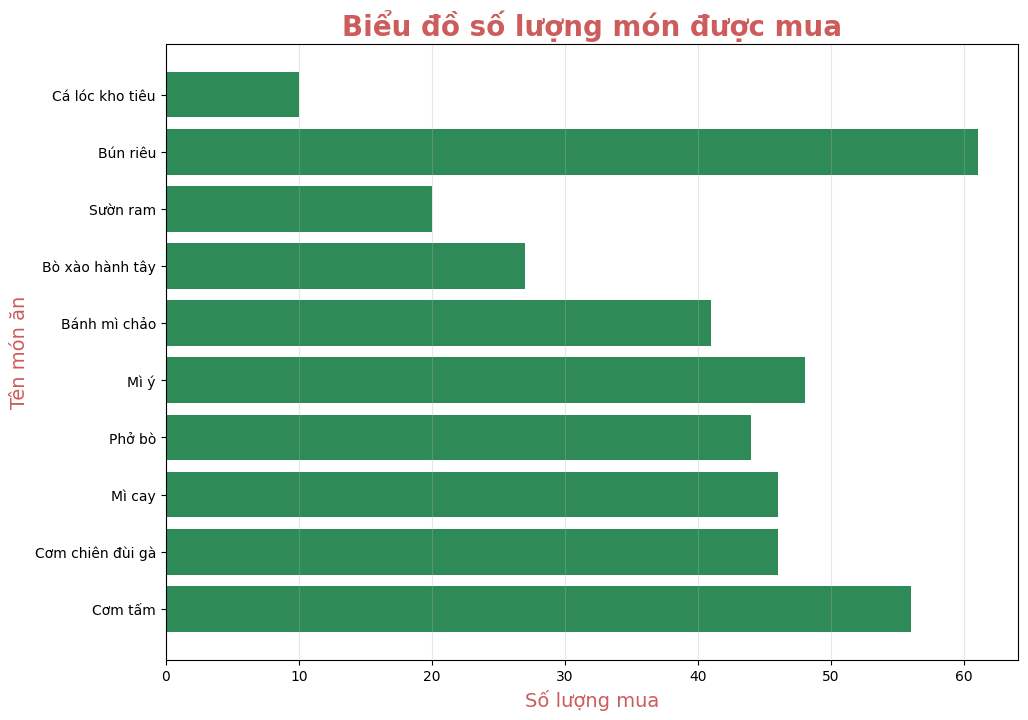

In [88]:
ser_MonAn = pd.Series(df['Món ăn'])
MonAn_SoLuong = [0]*10
MonAn_DanhSach = ['Cơm tấm','Cơm chiên đùi gà','Mì cay','Phở bò','Mì ý','Bánh mì chảo','Bò xào hành tây','Sườn ram','Bún riêu','Cá lóc kho tiêu']
for i in range(1,num + 1):
    for j in range(10):
        if ser_MonAn[i]==MonAn_DanhSach[j]:
            MonAn_SoLuong[j]+=1
plt.figure(figsize=(11, 8))
plt.barh(MonAn_DanhSach,MonAn_SoLuong,color='seagreen')
plt.grid(axis='x', alpha=0.3)
plt.title("Biểu đồ số lượng món được mua",fontsize=20,color='indianred',fontweight='bold')
plt.ylabel("Tên món ăn",fontsize=14,color='indianred')
plt.xlabel("Số lượng mua", fontsize=14, color='indianred')
plt.show()


## MÓN ĂN ĐƯỢC NHIỀU KHÁCH HÀNG ĐÁNH GIÁ CAO

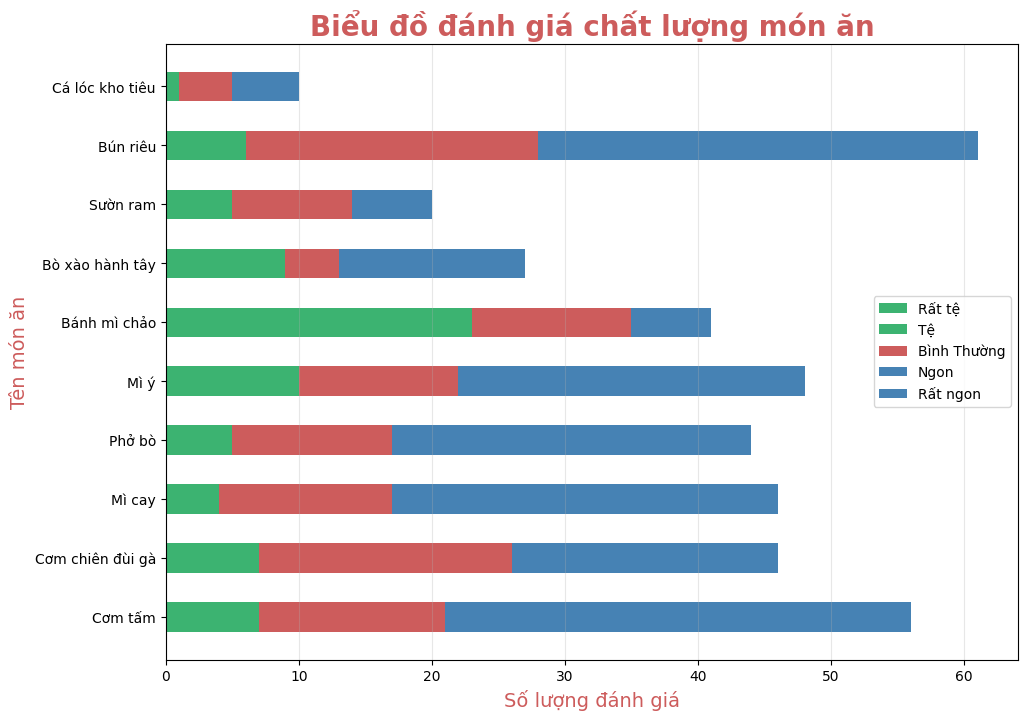

In [82]:
ser_DanhGiaMonAn = pd.Series(df['Đánh giá chất lượng món ăn'])
DanhGia = ['Rất tệ','Tệ','Bình thường','Ngon','Rất ngon']
KetQua_DanhGiaMonAn = []
for i in range(10):
    inner_list = [0] * 5
    KetQua_DanhGiaMonAn.append(inner_list)
for i in range(1,num + 1):
    for j in range (5):
        if ser_DanhGiaMonAn[i] == DanhGia[j]:
            for k in range (10):
                if ser_MonAn[i]==MonAn_DanhSach[k]:
                    KetQua_DanhGiaMonAn[k][j] +=1

DanhGia_RatTe = [0]*10
DanhGia_Te = [0]*10
DanhGia_BinhThuong = [0]*10
DanhGia_Ngon = [0]*10
DanhGia_RatNgon = [0]*10
for i in range (10):
    for j in range (5):
        if j == 0 : 
            DanhGia_RatTe[i] += KetQua_DanhGiaMonAn[i][j]
        if j == 1 : 
            DanhGia_Te[i] += KetQua_DanhGiaMonAn[i][j]
        if j == 2 :
            DanhGia_BinhThuong[i] += KetQua_DanhGiaMonAn[i][j]
        if j == 3 : 
            DanhGia_Ngon[i] += KetQua_DanhGiaMonAn[i][j]
        if j == 4 : 
            DanhGia_RatNgon[i] += KetQua_DanhGiaMonAn[i][j]

width = 0.5
plt.figure(figsize=(11, 8))
plt.barh(MonAn_DanhSach,DanhGia_RatTe,width,color='mediumseagreen',label='Rất tệ')
plt.barh(MonAn_DanhSach,DanhGia_Te,width,color='mediumseagreen',label='Tệ',left=DanhGia_RatTe)
plt.barh(MonAn_DanhSach,DanhGia_BinhThuong,width,color='indianred',label='Bình Thường',left =np.add(DanhGia_RatTe, DanhGia_Te))
plt.barh(MonAn_DanhSach,DanhGia_Ngon,width,color='steelblue',label='Ngon',left=np.add(DanhGia_RatTe, np.add(DanhGia_Te,DanhGia_BinhThuong)))
plt.barh(MonAn_DanhSach,DanhGia_RatNgon,width,color='steelblue',label='Rất ngon',left =np.add(DanhGia_RatTe, np.add(DanhGia_Te,np.add(DanhGia_BinhThuong,DanhGia_Ngon))))
plt.legend(loc='best')
plt.grid(axis='x', alpha=0.3)
plt.title("Biểu đồ đánh giá chất lượng món ăn",fontsize=20,color='indianred',fontweight='bold')
plt.ylabel("Tên món ăn",fontsize=14,color='indianred')
plt.xlabel("Số lượng đánh giá", fontsize=14, color='indianred')
plt.show()




## ĐÁNH GIÁ VỀ GIÁ CẢ VÀ CHẤT LƯỢNG PHỤC VỤ MÓN ĂN CỦA CĂN TIN

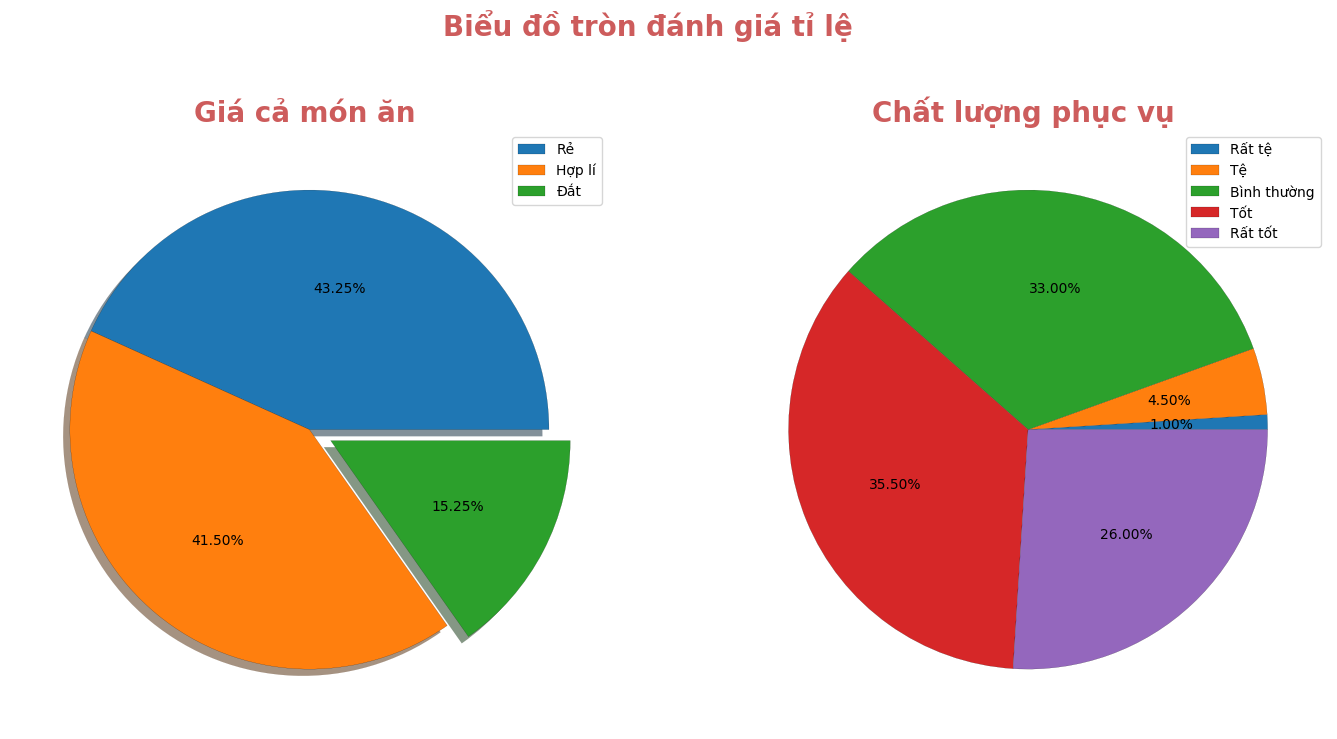

In [112]:
ser_GiaCa = pd.Series(df['Đánh giá về giá món ăn'])
DanhSach_GiaCa = ['Rẻ','Hợp lí','Đắt']
GiaCa_SoLuong = [0]*3
for i in range (1,num + 1):
    for j in range (len(DanhSach_GiaCa)):
        if ser_GiaCa[i]==DanhSach_GiaCa[j]:
            GiaCa_SoLuong[j] += 1

ser_DichVu = pd.Series(df['Đánh giá về dịch vụ canteen'])
DanhSach_DichVu = ['Rất tệ','Tệ','Bình thường','Tốt','Rất tốt']
DanhGia_ChatLuongPhucVu = [0]*5
for i in range (1,num + 1):
    for j in range (len(DanhSach_DichVu)):
        if ser_DichVu[i]==DanhSach_DichVu[j]:
            DanhGia_ChatLuongPhucVu[j] += 1


fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(17,8))

Explode1 = [0,0,0.1]
ax[0].pie(GiaCa_SoLuong,explode=Explode1,shadow=True,autopct='%1.2f%%',wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})
ax[0].legend(loc='best',labels=DanhSach_GiaCa)
ax[0].set_title("Giá cả món ăn ",fontsize=20,color='indianred',fontweight='bold')




Explode2 = [0,0,0,0,0]
ax[1].pie(DanhGia_ChatLuongPhucVu,explode=Explode2,shadow=False,autopct='%1.2f%%',wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'})
ax[1].legend(loc='best',labels=DanhSach_DichVu)
ax[1].set_title("Chất lượng phục vụ ",fontsize=20,color='indianred',fontweight='bold')

fig.suptitle('Biểu đồ tròn đánh giá tỉ lệ',verticalalignment= 'bottom',fontsize=20,color='indianred',fontweight='bold')

plt.show()